In [2]:
!pip3 install --upgrade pip
!pip3 install pandas
!pip3 install matplotlib
!pip3 install zipfile36==0.1.3
!pip3 install seaborn
!pip3 install numpy
!pip3 install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [3]:
pip install kaggle

In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download arnabchaki/data-science-salaries-2023

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 53.9MB/s]


In [10]:
! unzip data-science-salaries-2023.zip

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
bp_db = pd.read_csv( "ds_salaries.csv" )

In [52]:
import matplotlib.pyplot as plt

### 1

### 2

In [53]:
df = pd.read_csv("ds_salaries.csv")# чтение файла
df #y - 	salary_currency; x - salary_in_usd

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [15]:
df["salary_currency"].describe(include="all")

count     3755
unique      20
top        USD
freq      3224
Name: salary_currency, dtype: object

In [16]:
mean = df['salary_in_usd'].mean()# (среднее) ваш код здесь
mean

137570.38988015978

In [17]:
median = df['salary_in_usd'].median()# (медиана) ваш код здесь
median

135000.0

In [18]:
mode = df['salary_in_usd'].mode()# (мода) ваш код здесь
mode

0    100000
Name: salary_in_usd, dtype: int64

In [19]:
min = df['salary_in_usd'].min()# (минимум) ваш код здесь
min

5132

In [20]:
max = df['salary_in_usd'].max()# (максимум) ваш код здесь
max

450000

In [21]:
std = df['salary_in_usd'].std()# (стандартное отклонение) Ваш код здесь
std

63055.6252782241

In [22]:
q1 = df['salary_in_usd'].quantile(0.25)# (25% квантиль) ваш код здесь
q1

95000.0

In [23]:
q2 = df['salary_in_usd'].quantile(0.5)# (50% квантиль) ваш код здесь
q2

135000.0

In [24]:
q3 = df['salary_in_usd'].quantile(0.75)# (75% квантиль) ваш код здесь
q3

175000.0

In [25]:
iqr = q3 - q1
iqr

80000.0

Распределение нормальное асимметричное.

<Axes: xlabel='salary_in_usd', ylabel='Count'>

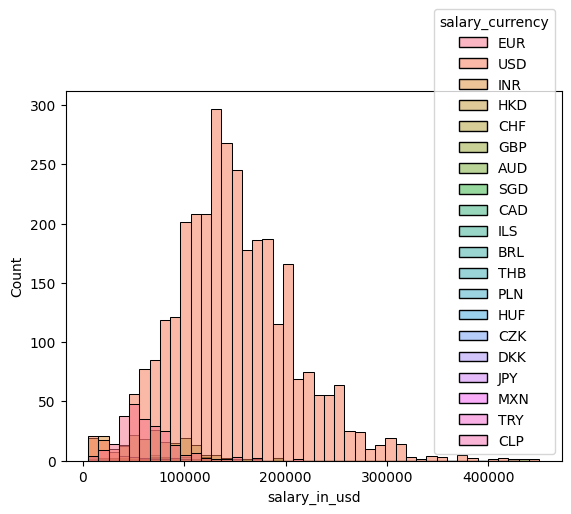

In [29]:
sns.histplot(data = df, x = "salary_in_usd", hue = "salary_currency")

Медиана -оценка 37.

### 3

### 4

In [55]:
a = bp_db["salary_in_usd"]
b = bp_db["salary_currency"]

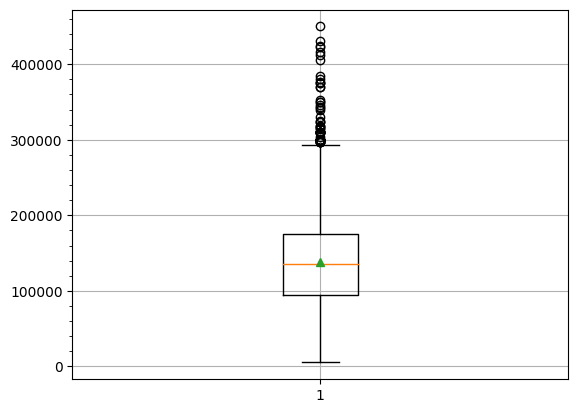

In [56]:
plt.boxplot(a, showmeans=True)
plt.grid()
plt.minorticks_on()
plt.show()

<Axes: xlabel='salary_in_usd', ylabel='salary_currency'>

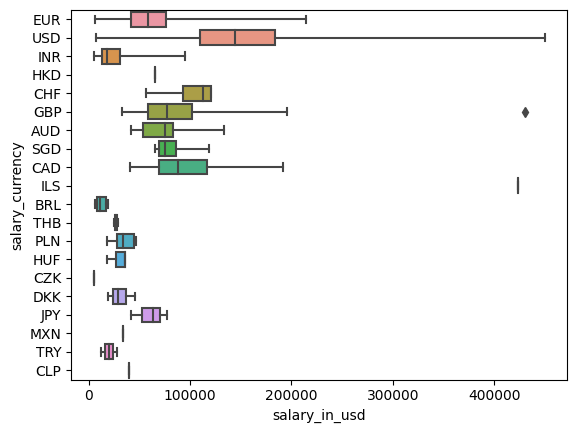

In [57]:
sns.boxplot(x='salary_in_usd', y='salary_currency', data=bp_db, whis=5)

<Axes: xlabel='salary_in_usd', ylabel='salary_currency'>

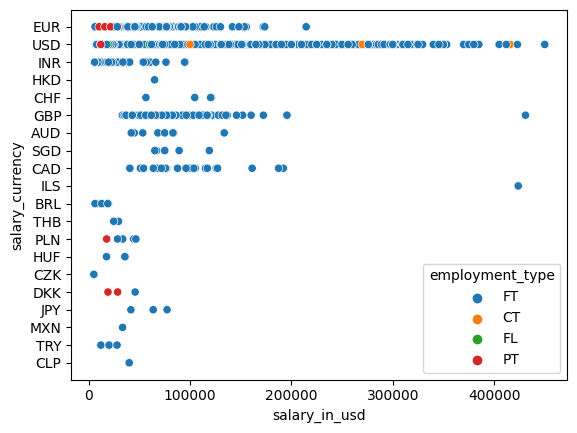

In [39]:
sns.scatterplot(data = df, y = "salary_currency", x = "salary_in_usd", hue="employment_type")

Гистограмма зависимости расы от оценки ugpa.

<ipython-input-34-ec51405d706c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

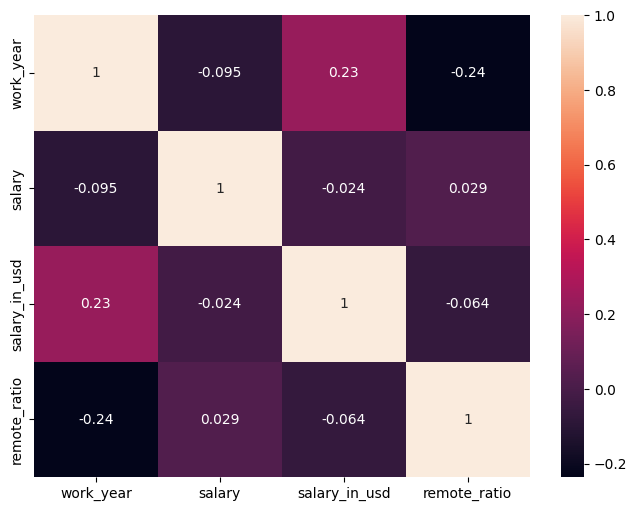

In [34]:

# Вычисление корреляционной матрицы
corr_matrix = df.corr()

# Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

Этот график показывает максимальную(минимальную) оценку у каждой из рас, медианы и квартили(верхний/нижний). По графику можно сказать, что максимальной оценки(4.9) добились все расы, с другой стороны порог у всех разный.

Тут показанно кол-во всех рас, очевидно, что представителей 7 расы больше всех.